In [8]:
from utils import get_mean_and_std
from datasets import MHIST, ADP_dataset
import numpy as np
import torch
from torchvision.transforms import ToTensor
from preprocessing.transforms import print_imgs, ProcessImages

In [83]:
%matplotlib inline

In [6]:
dataset = MHIST(transform = None, 
                root = "..\\..\\.adas-data",)
ADPdataset = ADP_dataset(transform = None, 
                root = "..\\..\\.adas-data",
                level = "L3",)

In [3]:
print(type(ADPdataset.samples))
print(ADPdataset.class_to_idx)

<class 'list'>
{'E': 0, 'E.M': 1, 'E.M.S': 2, 'E.M.C': 3, 'E.T': 4, 'E.T.S': 5, 'E.T.C': 6, 'C': 7, 'C.D': 8, 'C.D.I': 9, 'C.D.R': 10, 'C.L': 11, 'H': 12, 'H.E': 13, 'H.K': 14, 'H.Y': 15, 'S': 16, 'S.M': 17, 'S.C': 18, 'S.R': 19, 'A': 20, 'A.W': 21, 'A.M': 22, 'M': 23, 'N': 24, 'N.P': 25, 'N.R': 26, 'N.G': 27, 'N.G.M': 28, 'G': 29, 'G.O': 30, 'G.N': 31, 'T': 32}


In [17]:
print(dataset.class_to_idx)

{'HP': 0, 'SSA': 1}


In [92]:
from skimage.transform import resize, rescale

import matplotlib.pyplot as plt
import numpy as np


def reflection_wrap(dataset, dim=(272, 272)):
    fig, axes = plt.subplots(nrows=2, ncols=2)
    ax = axes.ravel()
    for j in range(4):
        image, _ = dataset[j]
        image = np.array(image)

        resized_img = np.zeros(dim + (3,))
        height, width, channel = image.shape
        height_factor = dim[0] // (height - 1)
        width_factor = dim[1] // (width - 1)

        height_resized_img = np.zeros((dim[0], width, 3))
        height_resized_img[:height, :width, :] = image

        # multiple flips

        for i in range(height_factor):
            direction = 1 if i % 2 else -1
            # start with -1, then 1, alternating
            height_start = height + i * (height - 1)
            height_end = height_start + height - 1
            height_end = height_end if height_end < dim[0] else dim[0]
            cropped_length = height_end - height_start + 1
            height_resized_img[height_start:height_end, :, :] = image[:(cropped_length * direction + (i % 2 - 1)):direction, :, :][1:, :, :]
        
        resized_img[:, :width, :] = height_resized_img

        for i in range(width_factor):
            direction = 1 if i % 2 else -1
            width_start = width + i * (width - 1)
            width_end = width_start + width - 1
            width_end = width_end if width_end < dim[1] else dim[1]
            cropped_length = width_end - width_start + 1
            resized_img[:, width_start:width_end, :] = height_resized_img[:, :(cropped_length * direction + (i % 2 - 1)):direction, :][:, 1:, :]


        print(resized_img.shape)
        print(np.max(resized_img))
        ax[j].imshow(resized_img.astype(np.uint8))
        ax[j].set_title("joe")

    plt.tight_layout()
    plt.show()
    fig.savefig("joe.png")


-1
224
272
49
-50
(48, 224, 3)
(48, 224, 3)
-1
(272, 272, 3)
255.0
-1
224
272
49
-50
(48, 224, 3)
(48, 224, 3)
-1
(272, 272, 3)
255.0
-1
224
272
49
-50
(48, 224, 3)
(48, 224, 3)
-1
(272, 272, 3)
255.0
-1
224
272
49
-50
(48, 224, 3)
(48, 224, 3)
-1
(272, 272, 3)
255.0


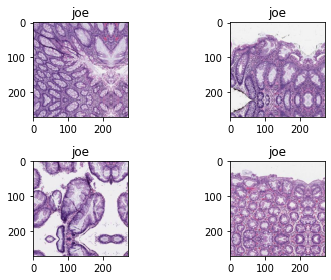

In [93]:
reflection_wrap(dataset)

In [100]:
img = np.array(dataset[0][0])
print(img.shape)

(224, 224, 3)


In [10]:
print(img[:-1, :, :].shape)

(223, 224, 3)


(112, 112, 3)
(112, 112, 3)
(112, 112, 3)
(112, 112, 3)


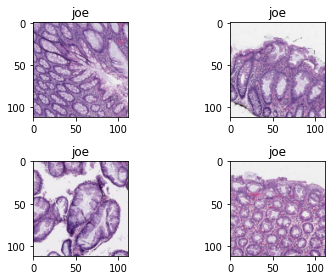

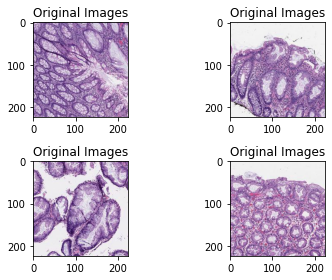

In [8]:
scale_up(dataset)
print_imgs(dataset)

In [3]:
processor = ProcessImages("joe", "joetime")

The dataset MUST HAVE ATTRIBUTES OF
root: the root folder of the dataset
class_to_idx: a dictionary converting class
    to index
samples: a list of tuples (image_path, class)


AttributeError: 'str' object has no attribute 'root'